## Predictive Analytics for Customer Conversion in Banking

 ### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1. Importing data

In [2]:
data1=pd.read_csv('Data1.csv')
data2=pd.read_csv('Data2.csv')

In [3]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [4]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [5]:
#Checking the shape of the data (rows,cols)
print("Shape Data 1:",data1.shape)
print("Shape Data 2:",data2.shape)

Shape Data 1: (5000, 8)
Shape Data 2: (5000, 7)


In [6]:
#Merging the two datasets based on the common ID present in both.
data=pd.merge(data1,data2,on="ID")

In [7]:
#Shape of the data after merging datasets
data.shape

(5000, 14)

### 2. Data Cleansing

In [8]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [9]:
#Changing data-type 
cols=['HiddenScore','Level','Security','FixedDepositAccount',
      'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in cols:
    data[i]=data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


In [11]:
#Checking for Null values
data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

>**LoanOnCard which happens to be out target variable has some missing values.**

>**The best way to deal with them would be to drop them as they are less in number.**

In [12]:
data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [13]:
data.dropna(subset=['LoanOnCard'], inplace=True)

In [14]:
data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [15]:
data.shape

(4980, 14)

###  3. EDA

In [16]:
data.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


>**The mean and median of columns 'Age' and 'CustomerSince' are almost same indicating lack of skewness.**

>**On the other hand, the 'HighestSpend' and 'MonthlyAverageSpend' columns show positive skewness as their mean values are greater than their medians.**

>**There are inconsistencies in 'Mortgage' col since there are no values in 50% and max value is 635, which indicates that its heavily influenced by outliers.**

####  Univariate Analysis

Total number of outliers in Age: 0


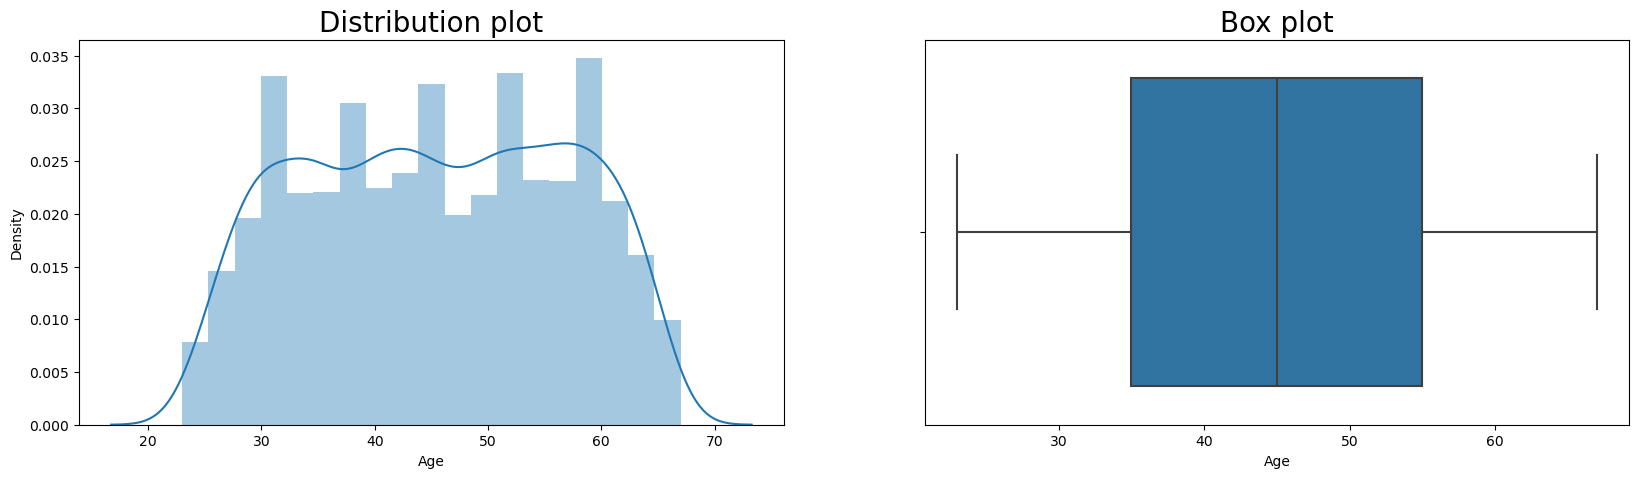

In [17]:
#1.Age
# Creating subplots
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
#Plotting distribution and box plot
sns.distplot(data['Age'], ax=axes[0])
sns.boxplot(x='Age', data=data, orient='h', ax=axes[1])
#Title
axes[0].set_title('Distribution plot',fontsize=20)
axes[1].set_title('Box plot',fontsize=20)
#Calculating number of outliers
q1, q3 = data['Age'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print(f"Total number of outliers in Age: {len(outliers)}")

>**There are no outliers in 'Age' col**

>**As we can see Age is quite normally distributed with the center being a little wider indicating that majority of individuals fall within the age range of 35 to 65 years old.**

Total number of outliers in CustomerSince: 0


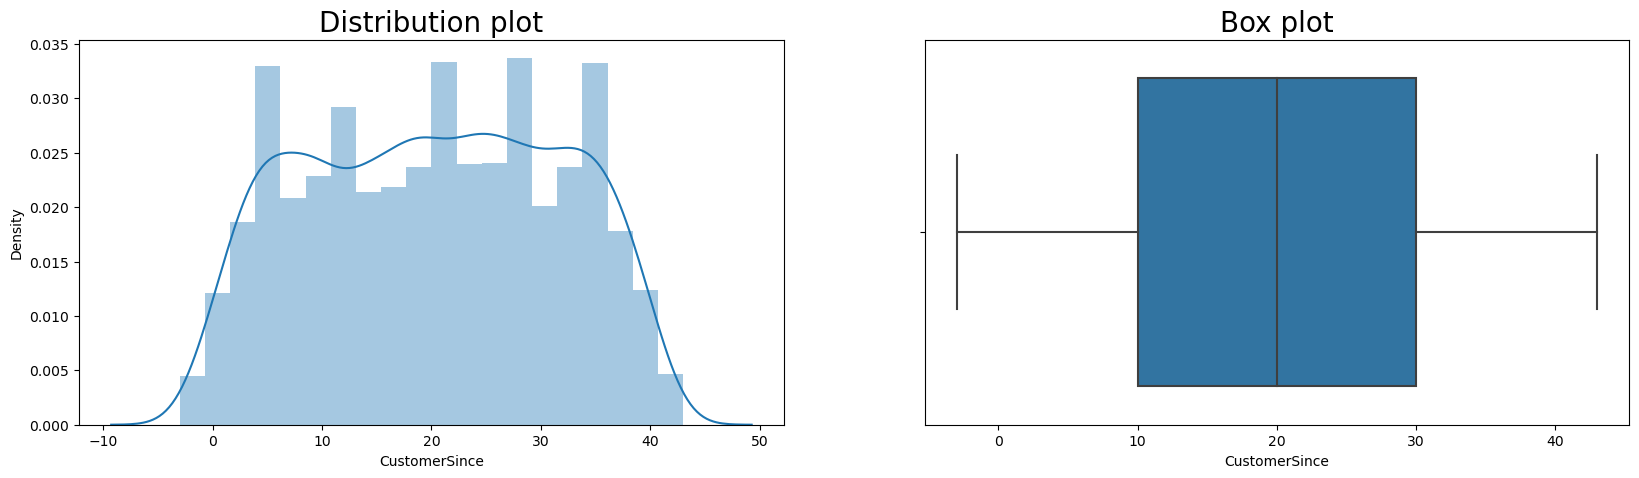

In [18]:
#2. CustomerSince
#Creating subplots
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
#Plotting distribution and box plot
sns.distplot(data['CustomerSince'], ax=axes[0])
sns.boxplot(x='CustomerSince', data=data, orient='h', ax=axes[1])
#Title
axes[0].set_title('Distribution plot',fontsize=20)
axes[1].set_title('Box plot',fontsize=20)
#Calculating number of outliers
q1, q3 = data['CustomerSince'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['CustomerSince'] < lower_bound) | (data['CustomerSince'] > upper_bound)]
print(f"Total number of outliers in CustomerSince: {len(outliers)}")

> **Majority of the people joined the bank between 10-30. (Since the units are not mentioned)**

> **Also on outliers in 'CustomerSince' col.**

Total number of outliers in HighestSpend: 96


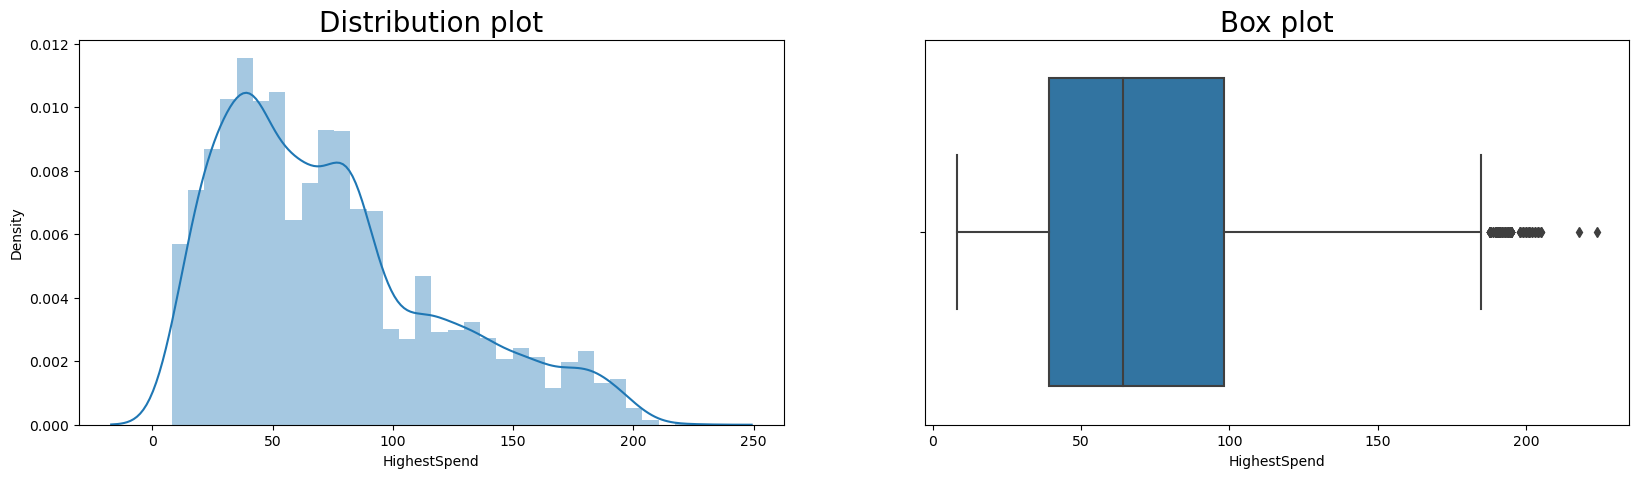

In [19]:
#3. HighestSpend
#Creating subplots
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
#Plotting distribution and box plot
sns.distplot(data['HighestSpend'], ax=axes[0])
sns.boxplot(x='HighestSpend', data=data, orient='h', ax=axes[1])
#Title
axes[0].set_title('Distribution plot',fontsize=20)
axes[1].set_title('Box plot',fontsize=20)
#Calculating number of outliers
q1, q3 = data['HighestSpend'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['HighestSpend'] < lower_bound) | (data['HighestSpend'] > upper_bound)]
print(f"Total number of outliers in HighestSpend: {len(outliers)}")

> **The data in col 'HighestSpend' is positively skewed.**

> **There are 96 outliers in this col.**

Total number of outliers in MonthlyAverageSpend: 324


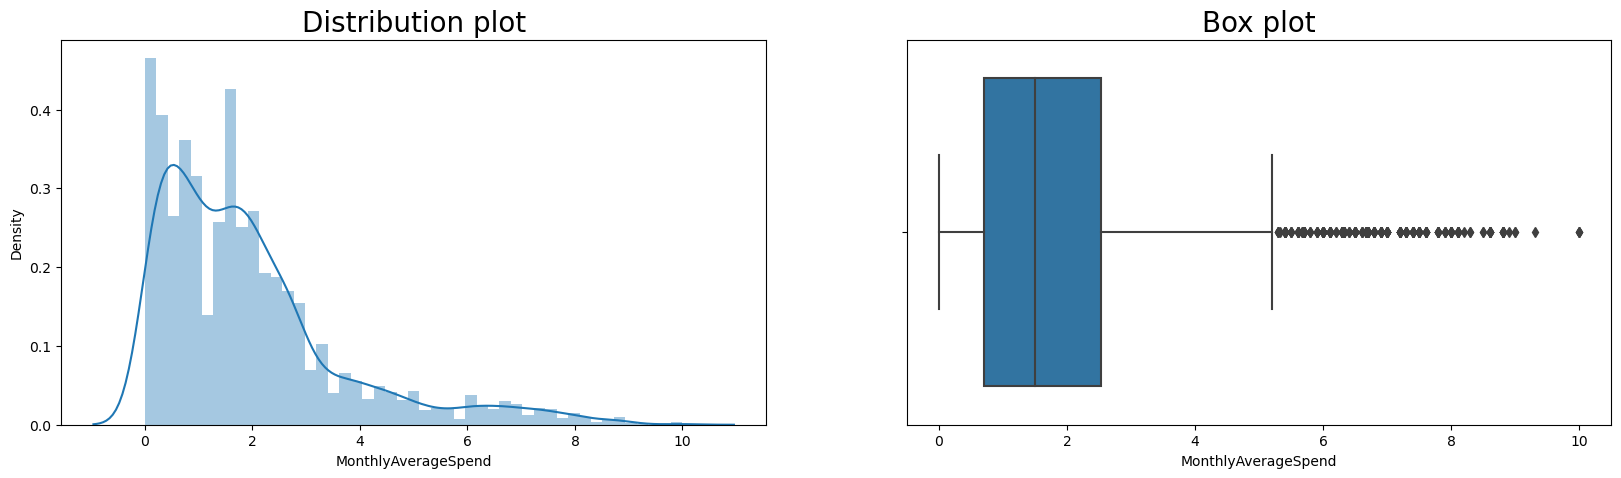

In [20]:
#4. MonthlyAverageSpend
#Creating subplots
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
#Plotting distribution and box plot
sns.distplot(data['MonthlyAverageSpend'], ax=axes[0])
sns.boxplot(x='MonthlyAverageSpend', data=data, orient='h', ax=axes[1])
#Title
axes[0].set_title('Distribution plot',fontsize=20)
axes[1].set_title('Box plot',fontsize=20)
#Calculating number of outliers
q1, q3 = data['MonthlyAverageSpend'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['MonthlyAverageSpend'] < lower_bound) | (data['MonthlyAverageSpend'] > upper_bound)]
print(f"Total number of outliers in MonthlyAverageSpend: {len(outliers)}")

>**The data in the column appears to be highly positively skewed.**

>**The monthly average spend of the customers mostly ranges from 1 to 3.**

>**There is a high number of outliers in the data(324), indicating that some customers have spent a large amount compared to the rest of the customers.**

Total number of outliers in Mortgage: 291


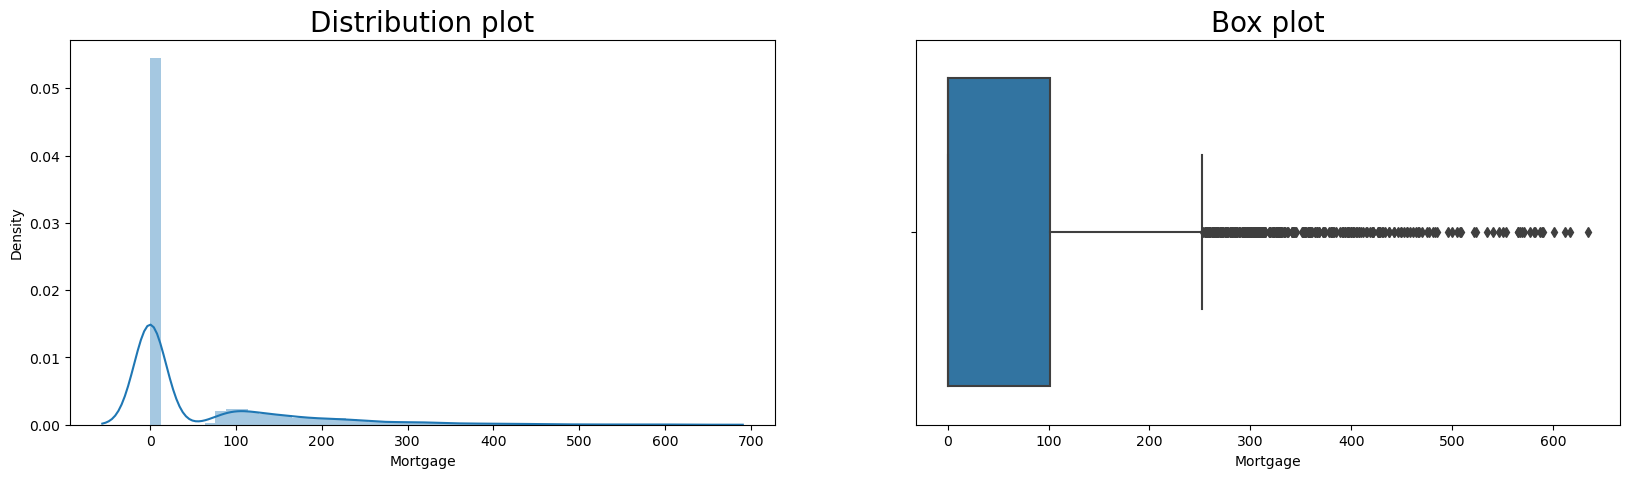

In [21]:
#4.Mortgage
#Creating subplots
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
#Plotting distribution and box plot
sns.distplot(data['Mortgage'], ax=axes[0])
sns.boxplot(x='Mortgage', data=data, orient='h', ax=axes[1])
#Title
axes[0].set_title('Distribution plot',fontsize=20)
axes[1].set_title('Box plot',fontsize=20)
#Calculating number of outliers
q1, q3 = data['Mortgage'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['Mortgage'] < lower_bound) | (data['Mortgage'] > upper_bound)]
print(f"Total number of outliers in Mortgage: {len(outliers)}")

>**The majority of cases in the dataset have a value of zero, indicating that most customers do not have a mortgage.**

>**The data does not have a proper distribution making it difficult to draw inferences.**

Text(0.5, 1.0, 'HiddenScore:Pie Chart')

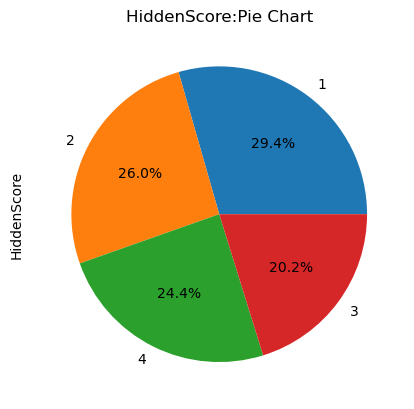

In [22]:
#5.HiddenScore
data['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('HiddenScore:Pie Chart')

>**All the categories are almost equally distributed**

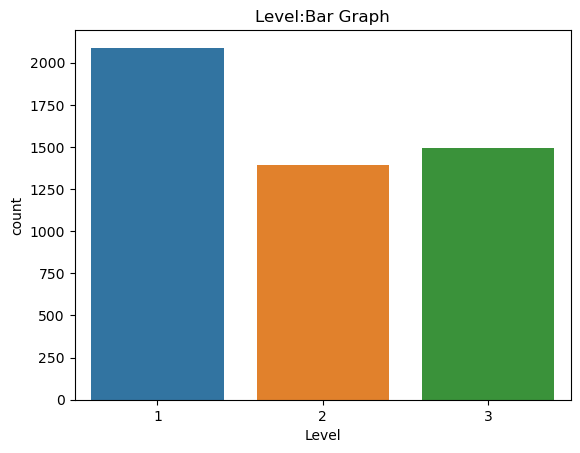

In [23]:
#6. Level
sns.countplot('Level',data=data,order=[1,2,3])
plt.title('Level:Bar Graph')
plt.show()

>**Level 1 customers have a higher frequency compared to the other levels.**

>**We can see Level 2 and 3 are nearly equally distributed.**

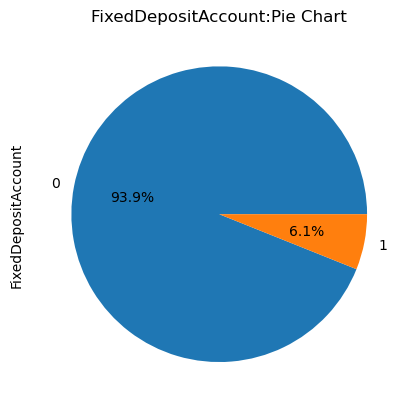

In [24]:
#7. Fixed Deposite Account
data['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('FixedDepositAccount:Pie Chart')
plt.show()

>**Majority of customers, 93.9%, do not have a fixed deposit account.**

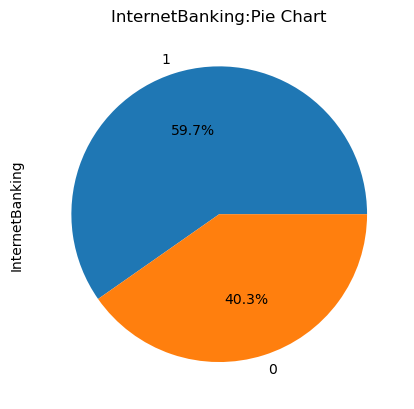

In [25]:
#8.Internet Banking
data['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('InternetBanking:Pie Chart')
plt.show()

>**Around 60% of the people use internet banking**

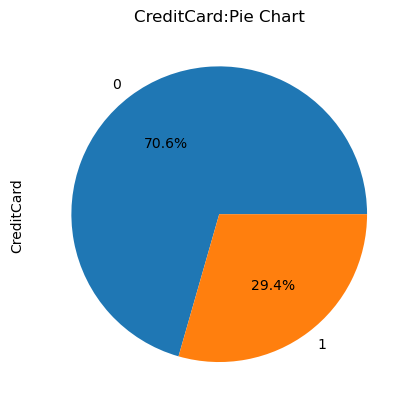

In [26]:
#9.CreditCard
data['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('CreditCard:Pie Chart')
plt.show()

> **Around 70% people use credit card.**

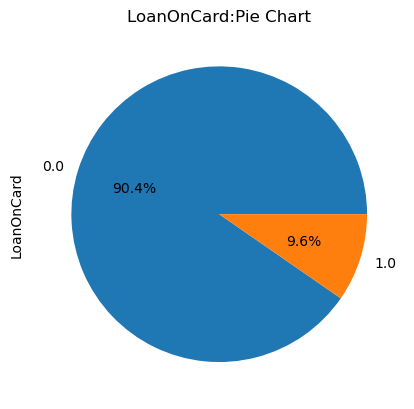

In [27]:
#10. LoanOnCard
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('LoanOnCard:Pie Chart')
plt.show()

> **90% of the people dont have a loan on card**

#### Bi-variate analysis

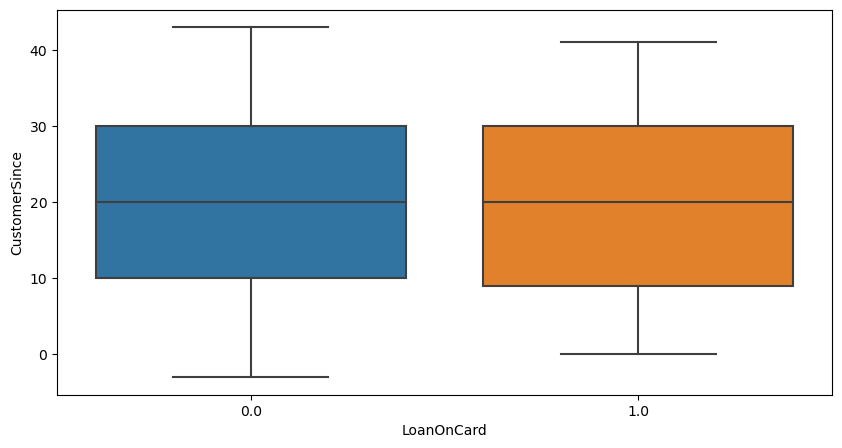

In [28]:
#Numerical vs Categorical variable
#1. Loan On Card vs CustomerSince
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= data)
plt.show()

>**The distribution of customer tenure is similar for both loan holders and non-loan holders in the bank.**

In [29]:
loan_cust= data.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10)
print(loan_cust)

  LoanOnCard  CustomerSince
1        1.0      19.843750
0        0.0      20.146889


>**The mean values are also nearly equal for both loan and non loan holders**

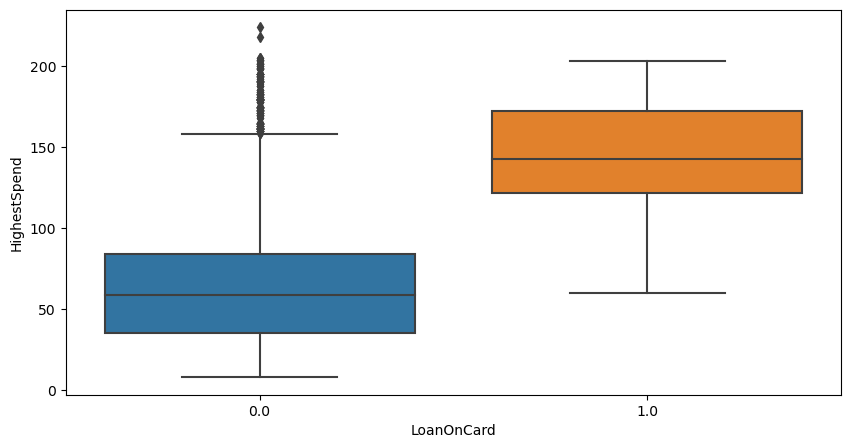

In [30]:
#2.HighestSpend vs LoanOnCard
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= data)
plt.show()

>**Customers with a loan on their card tend to spend more than those without a loan. However, some customers without a loan also have high spending.**

In [31]:
loan_spend= data.groupby(by=['LoanOnCard'])['HighestSpend'].mean().reset_index().sort_values(['HighestSpend']).tail(10)
print(loan_spend)

  LoanOnCard  HighestSpend
0        0.0     66.290444
1        1.0    144.745833


>**Loan holders tend to have a higher mean value of highest spend compared to non-loan holders.**

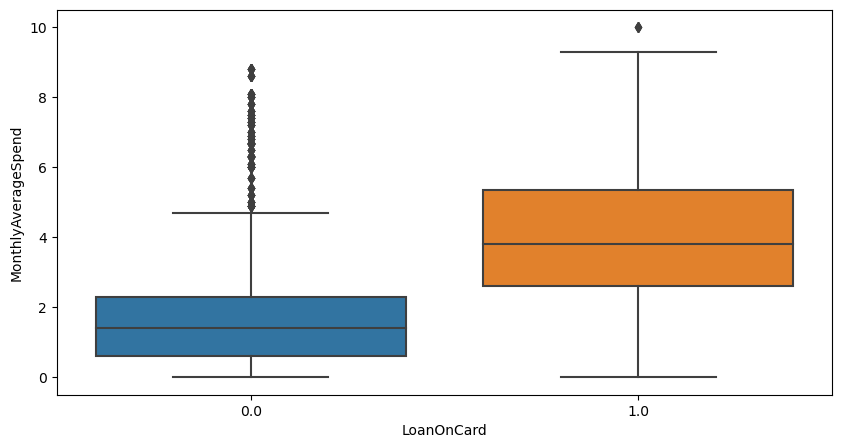

In [32]:
#3.MonthlyAverageSpend vs LoanOnCard
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= data)
plt.show()

>**Monthly average spend is more for loan holders**

In [33]:
loan_spend_mon= data.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend']).tail(10)
print(loan_spend_mon)

  LoanOnCard  MonthlyAverageSpend
0        0.0             1.729849
1        1.0             3.905354


> **Average spend mean values are more for loan holders.**

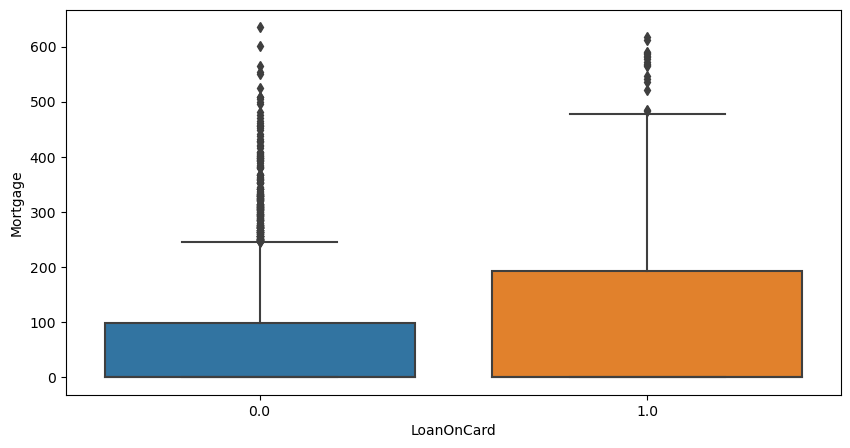

In [34]:
#4.Mortgage vs LoanOnCard
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= data)
plt.show()

>**Customers with a loan have a higher mortgage value on average.**

>**There are extreme values present in both cases.**

In [35]:
loan_mor= data.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).tail(10)
print(loan_mor)

  LoanOnCard    Mortgage
0        0.0   51.869111
1        1.0  100.845833


> **Mortgage Mean values are more for loan holders**

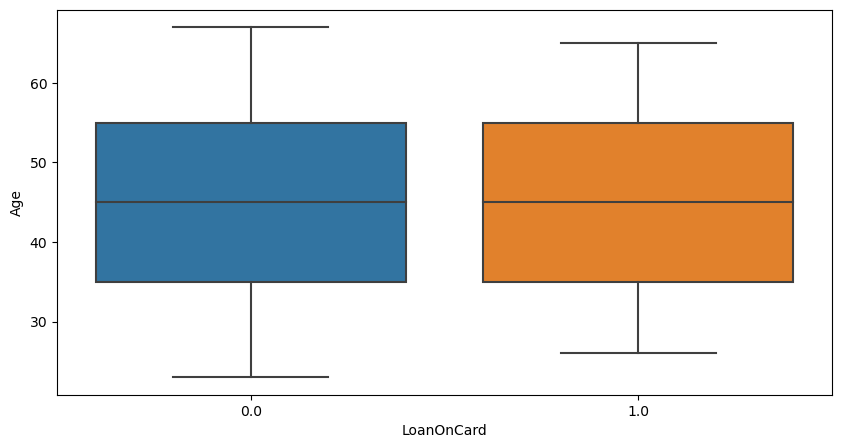

In [36]:
#5.Age vs LoanOnCard
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanOnCard', y='Age', data= data)
plt.show()

> **Age distribution is nearly equal for both loan holders and non-loan holders**

In [37]:
loan_age= data.groupby(by=['LoanOnCard'])['Age'].mean().reset_index().sort_values(['Age']).tail(10)
print(loan_age)

  LoanOnCard        Age
1        1.0  45.066667
0        0.0  45.383111


>**Based on the mean values, there does not appear to be a significant difference in age between customers who have taken out loans and those who have not.**

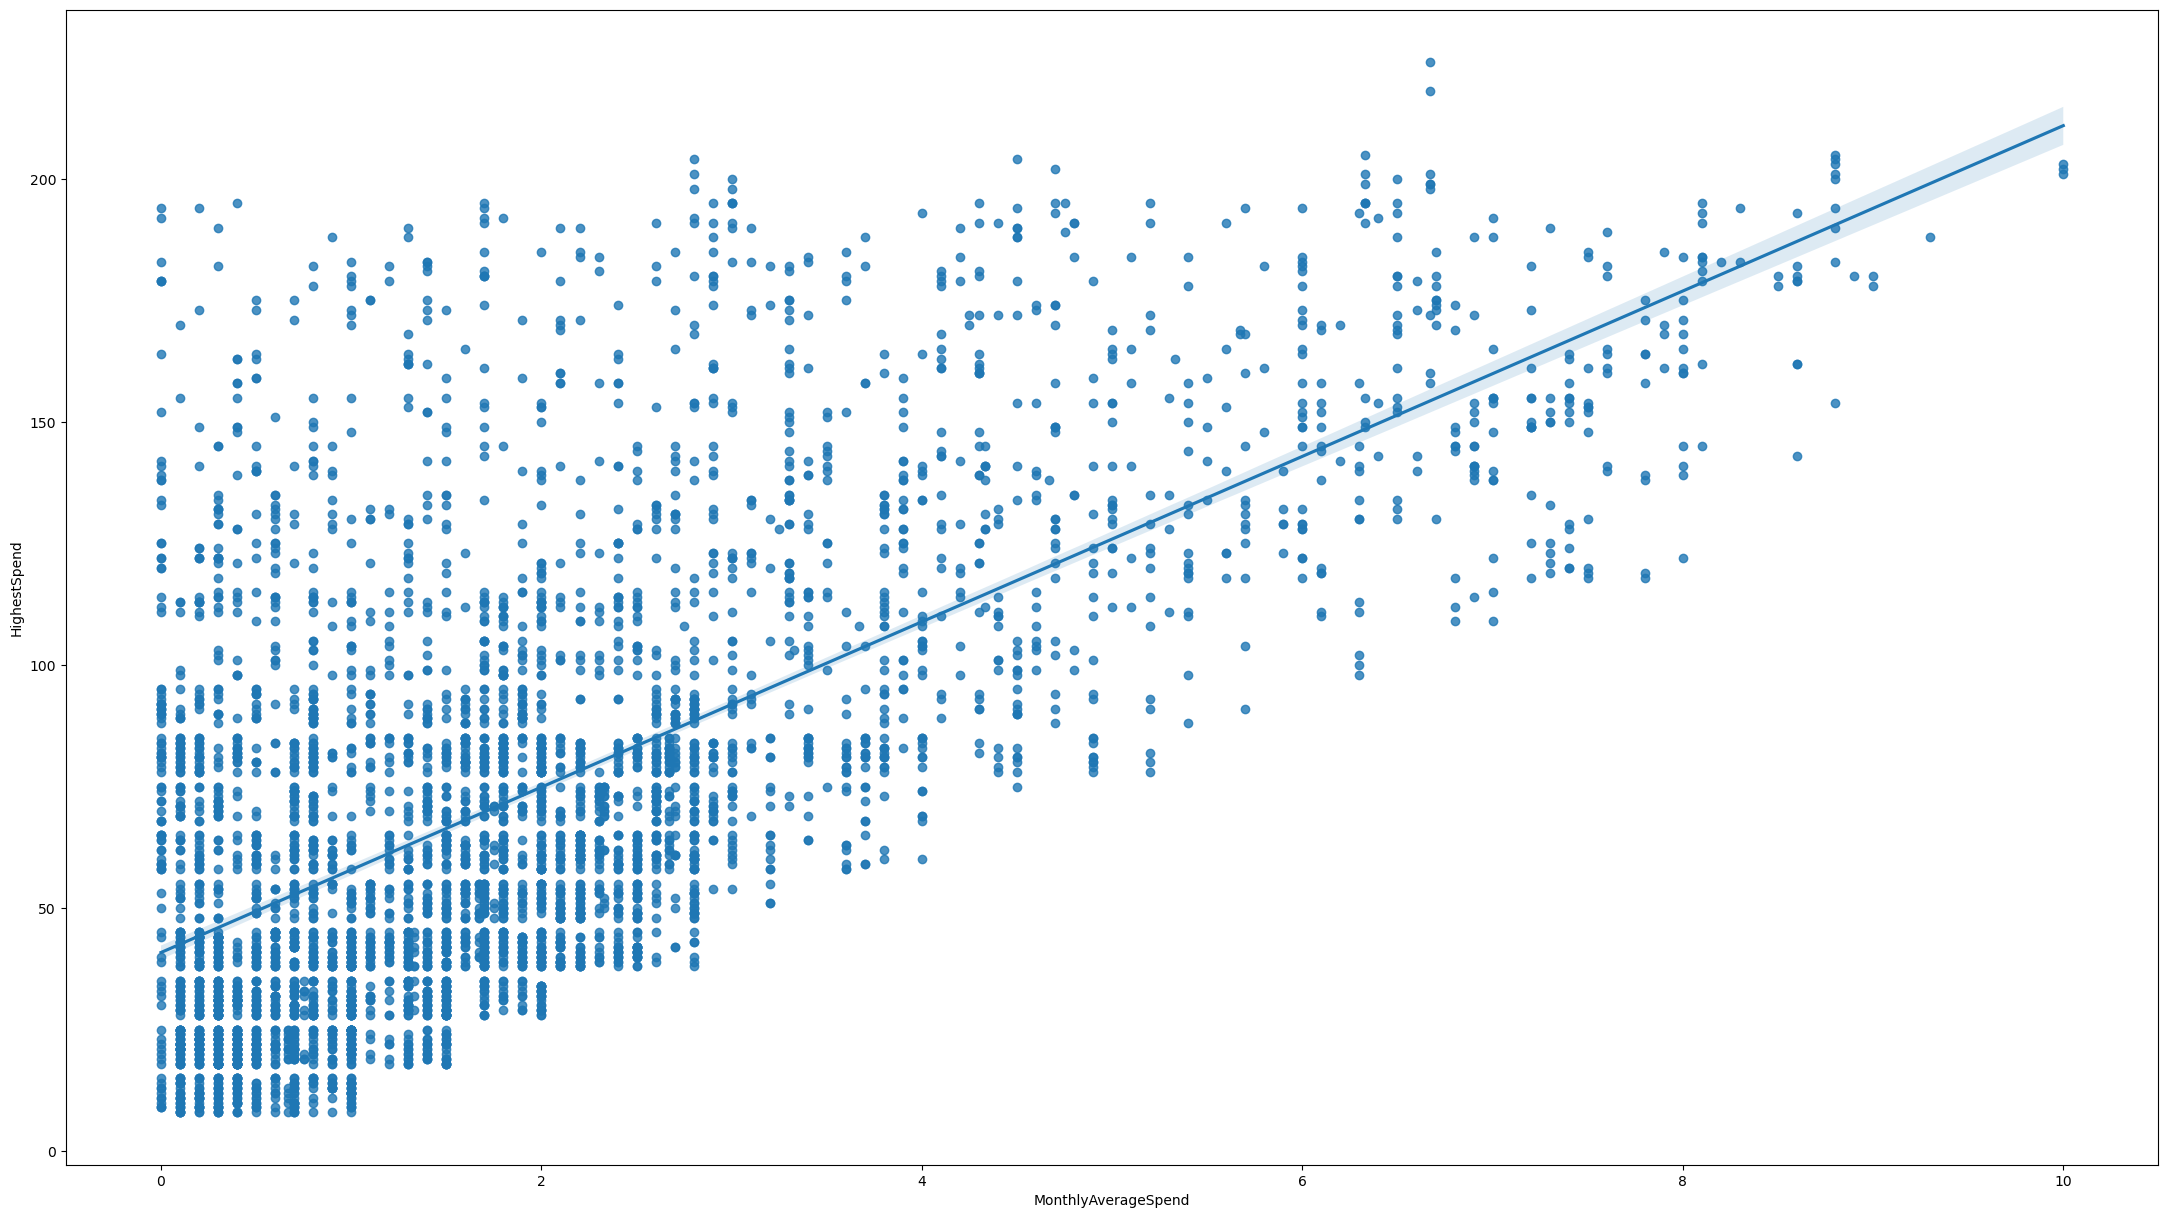

In [38]:
#Numerical vs Numerical variables
#1.MonthlyAverageSpend vs HighestSpend
fig= plt.figure(figsize=(27,15))
ax = sns.regplot(x='MonthlyAverageSpend',y='HighestSpend', data=data)

>**The Monthly average spend and highest spend variables are positively correlated, indicating a linear relationship between them.**

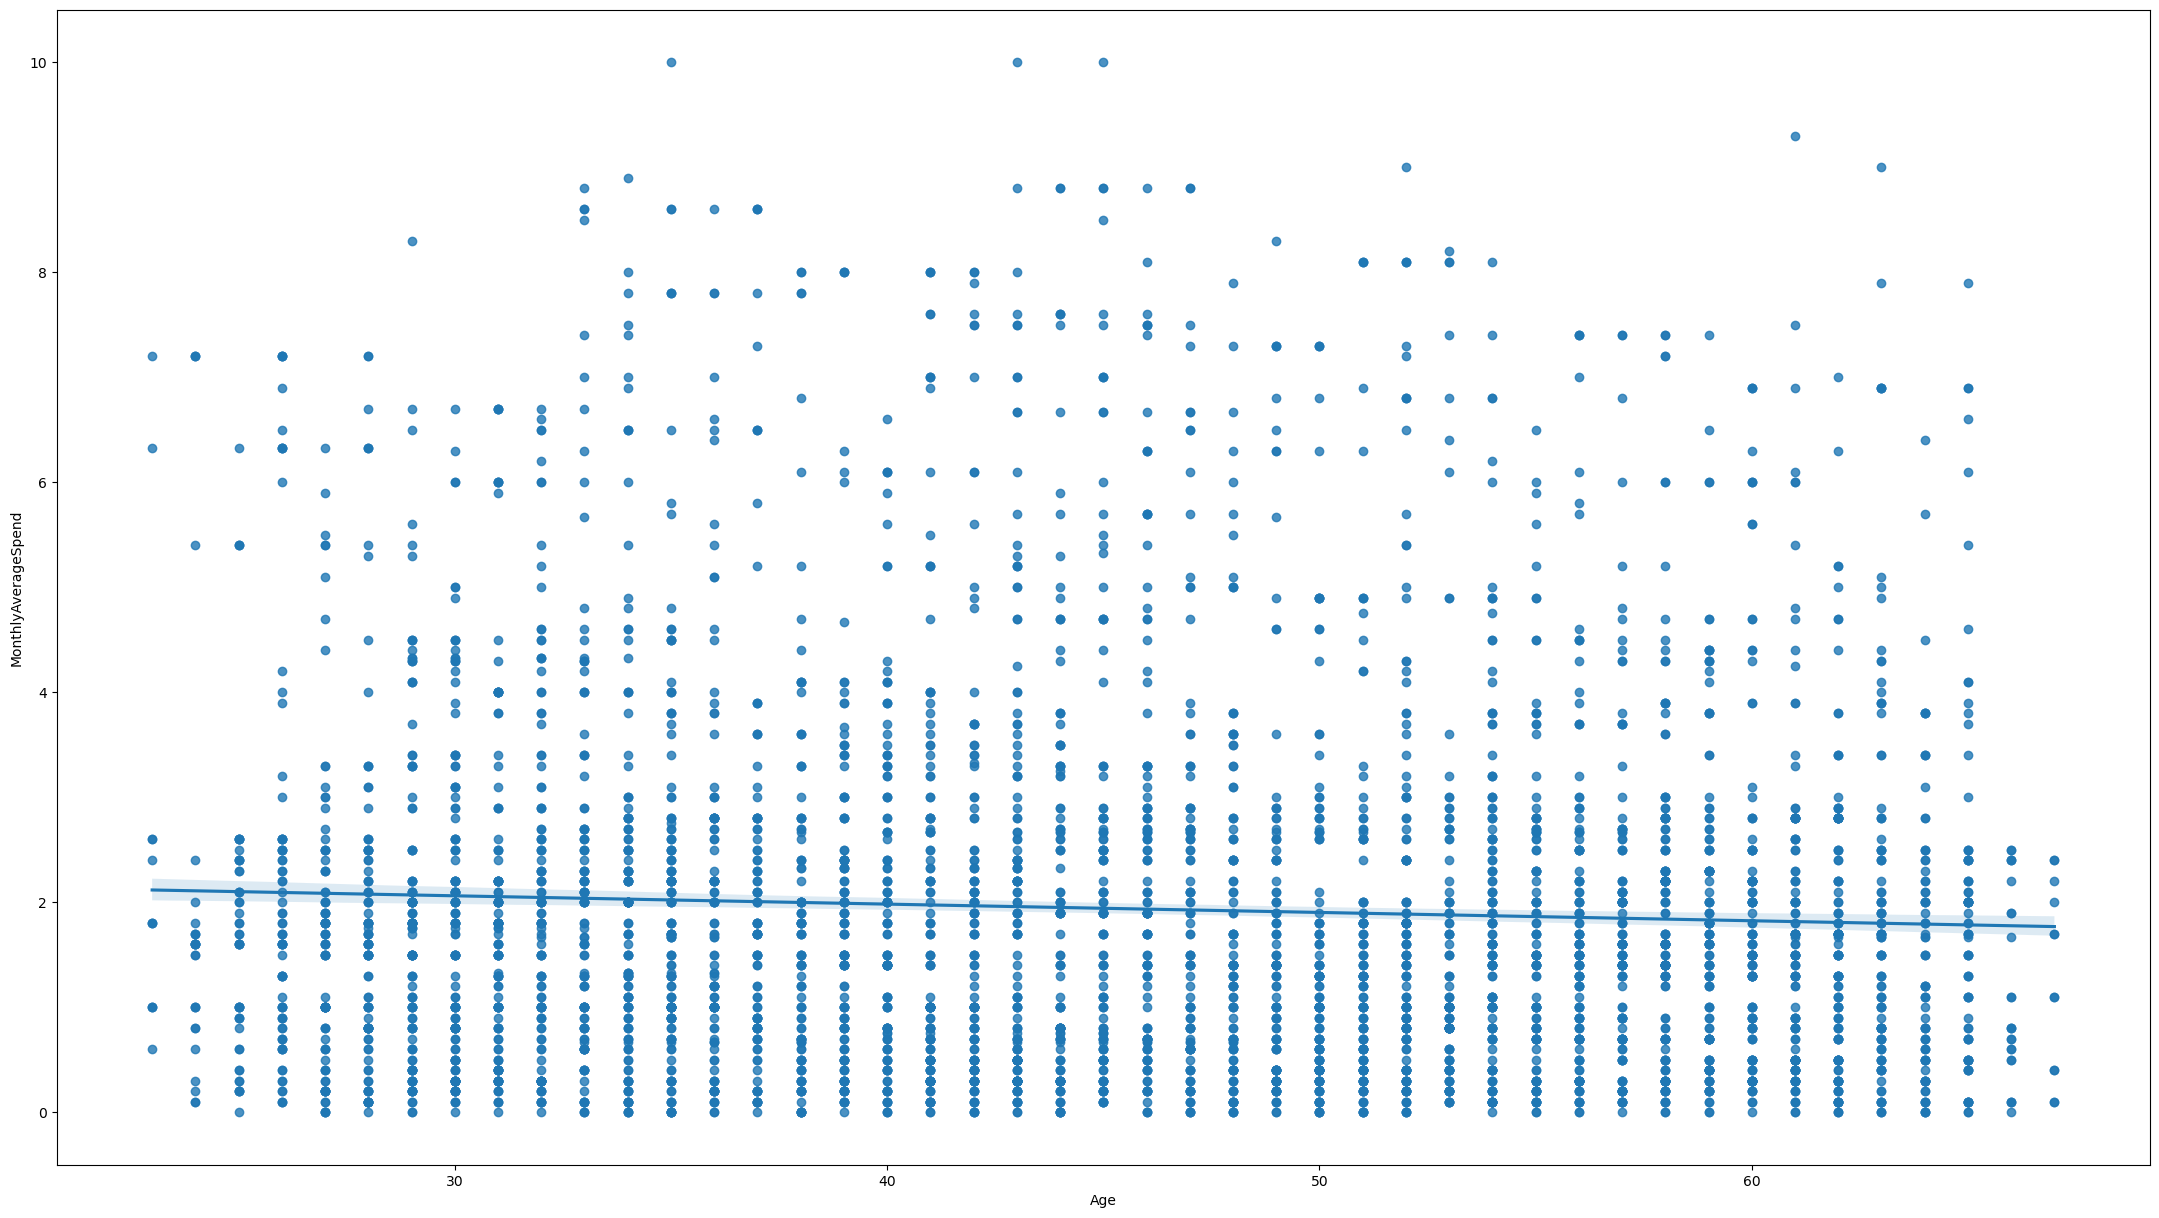

In [39]:
#2.Age vs MonthlyAverageSpend
fig = plt.figure(figsize=(27,15))
ax = sns.regplot(x='Age',y='MonthlyAverageSpend', data=data)

>**There is no apparent relationship between age and spending behavior.**

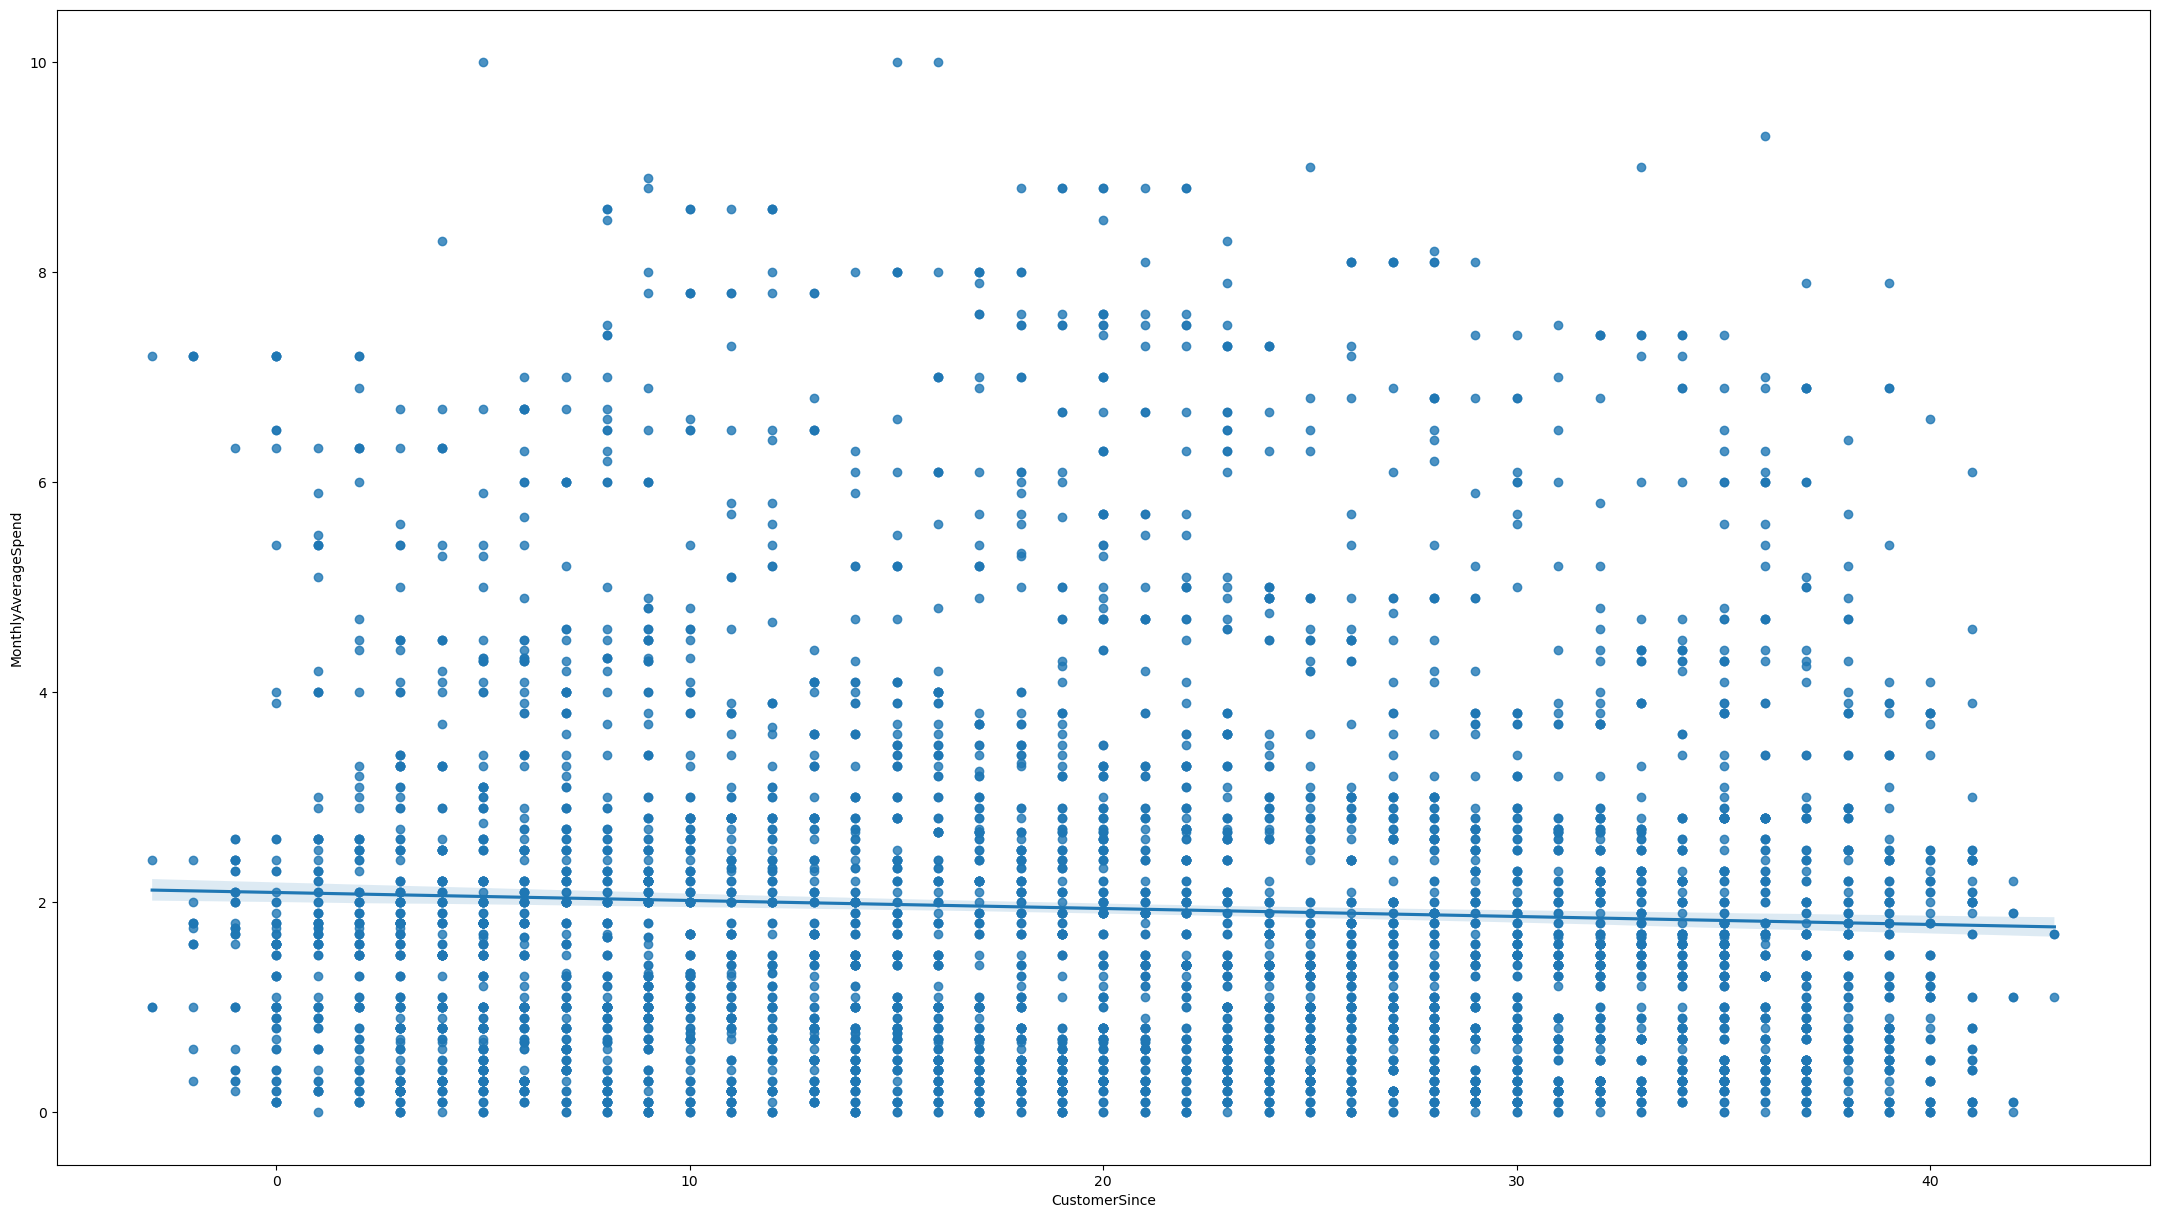

In [40]:
#3.CustomerSince vs MonthlyAverageSpend
figure = plt.figure(figsize=(27,15))
ax = sns.regplot(x='CustomerSince',y='MonthlyAverageSpend', data=data)

>**There is no clear relationship between customer period and spend.**

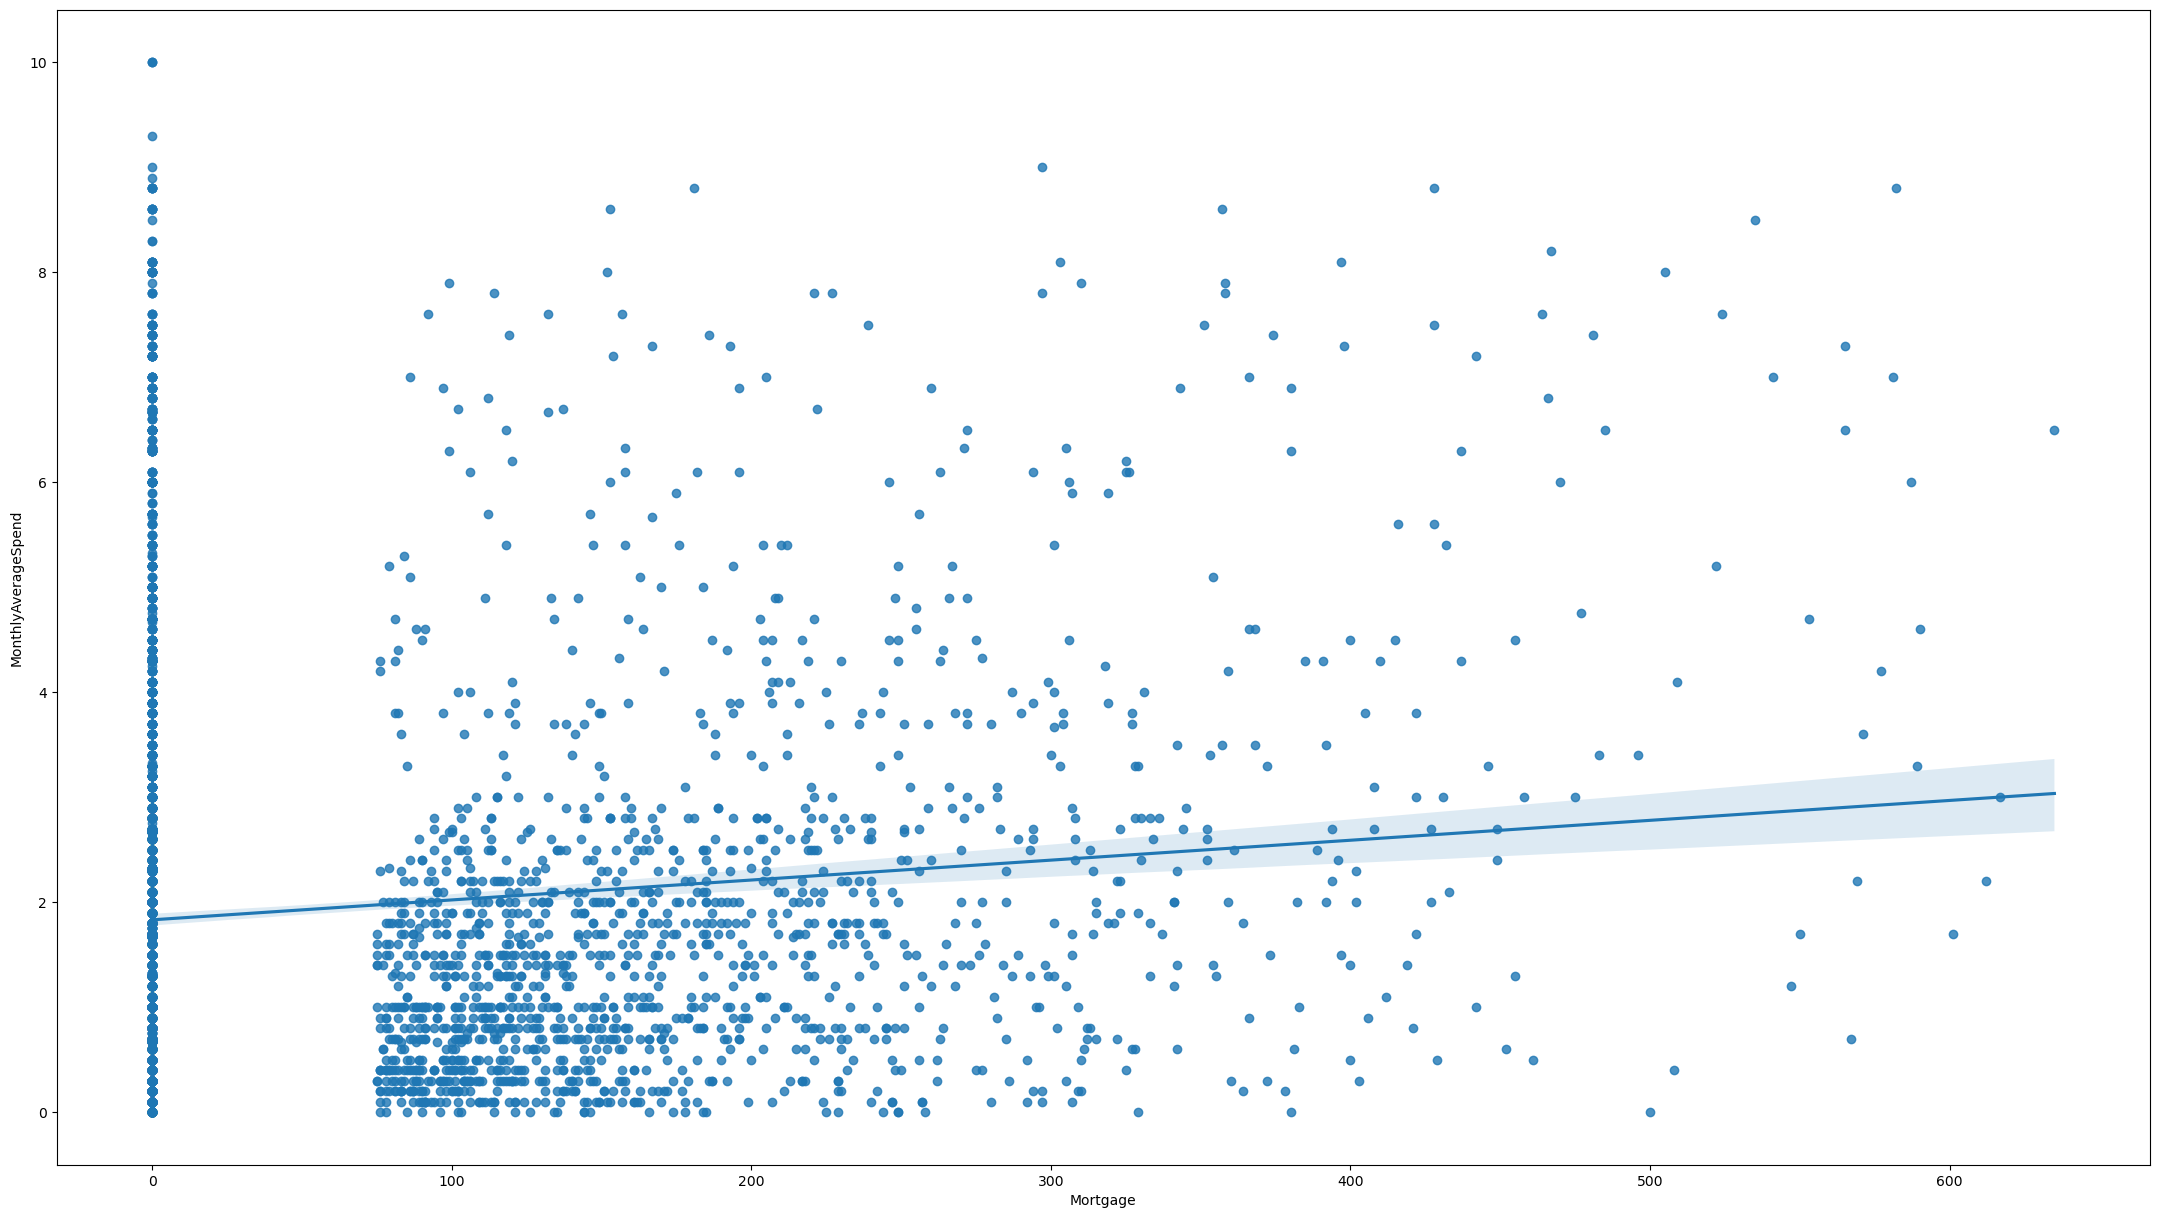

In [41]:
#4.Mortgage vs MonthlyAverageSpend
figure = plt.figure(figsize=(27,15))
ax = sns.regplot(x='Mortgage',y='MonthlyAverageSpend', data=data)

>**There seems to be a weak correlation between mortgage value and spend**

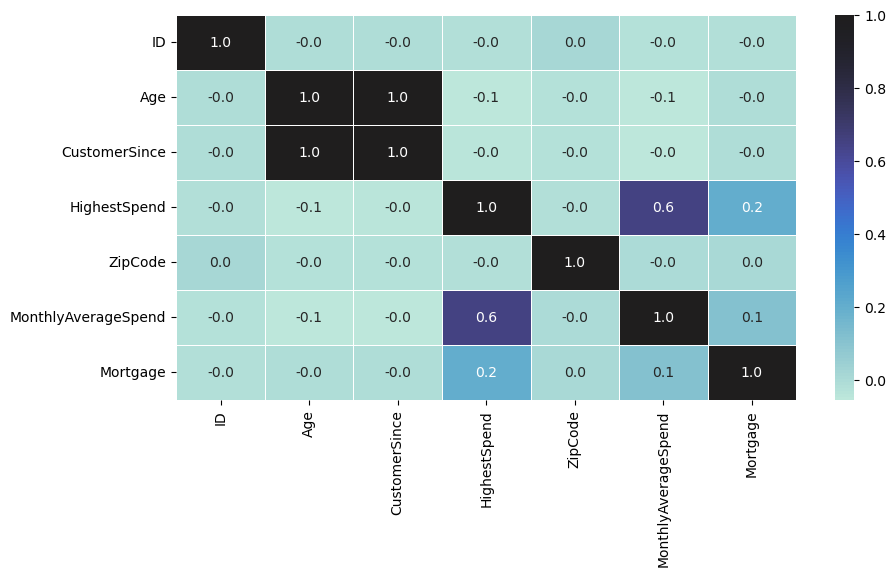

In [42]:
#HeatMap showing the corr between variables
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

>**'Age' and 'CustomerSince' are highly correlated with a correlation coefficient of 1.Therefore, either variable can be used in the model.**

>**There is a strong positive correlation between 'HighestSpend' and 'MonthlyAverageSpend'.**

>**'Mortgage' and 'HighestSpend' have a weak positive correlation.**

>**The rest of the variables do not have any significant correlation with each other.**

<AxesSubplot:xlabel='HiddenScore', ylabel='count'>

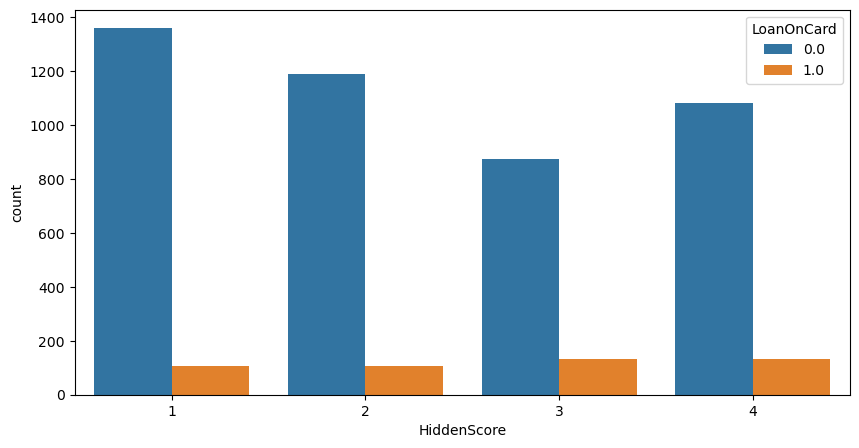

In [43]:
#Category  vs Category
#1.Hidden Score vs Loan on card
plt.figure(figsize=(10,5))
sns.countplot(data['HiddenScore'],hue=data['LoanOnCard'])

>**Non-loan holders have a higher hidden score compared to loan holders**

<AxesSubplot:xlabel='Level', ylabel='count'>

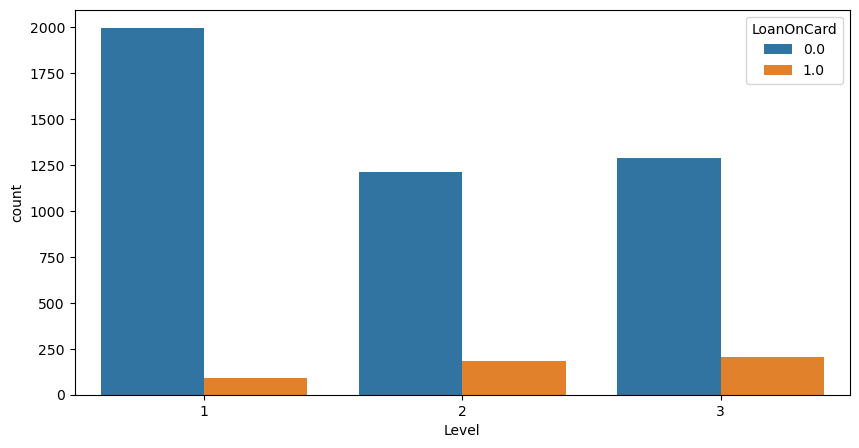

In [44]:
#2.Level vs LoanOnCard
plt.figure(figsize=(10,5))
sns.countplot(data['Level'],hue=data['LoanOnCard'])

>**Majority of Level 1 customers do not have loans.**

>**There is a similar proportion of loan holders in Level 2 and 3**

<AxesSubplot:xlabel='Security', ylabel='count'>

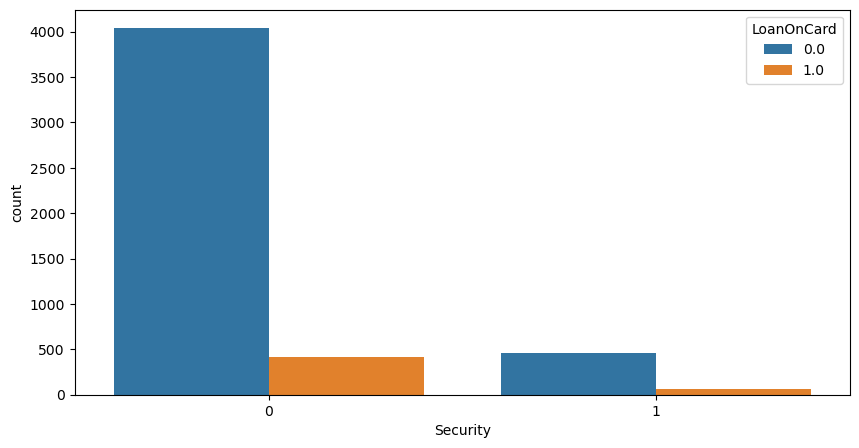

In [45]:
#3.Security vs LoanOnCard
plt.figure(figsize=(10,5))
sns.countplot(data['Security'],hue=data['LoanOnCard'])

> **It is surprisingly to see more customers those who have loan does not have any security**

> **Security of loan holders are very less**


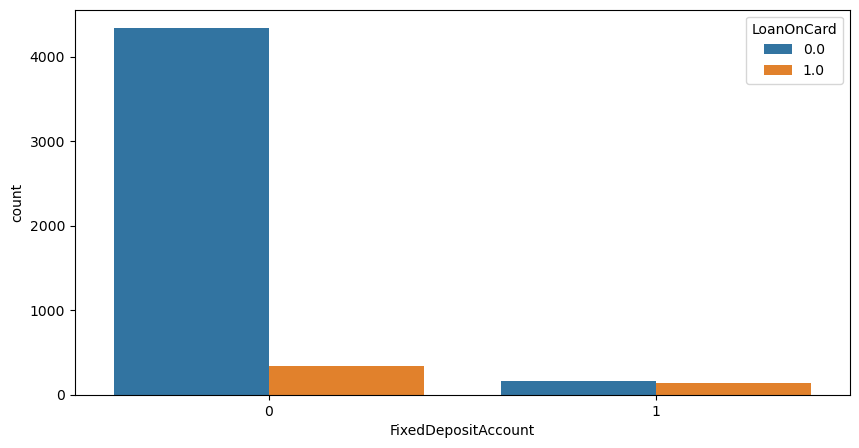

In [46]:
#4.FixedDepositAccount vs  Loanoncard
plt.figure(figsize=(10,5))
sns.countplot(data['FixedDepositAccount'],hue=data['LoanOnCard'])
plt.show()

>**There are more customers who do not have a loan compared to those who have a loan.**

#### Multi-variate analysis

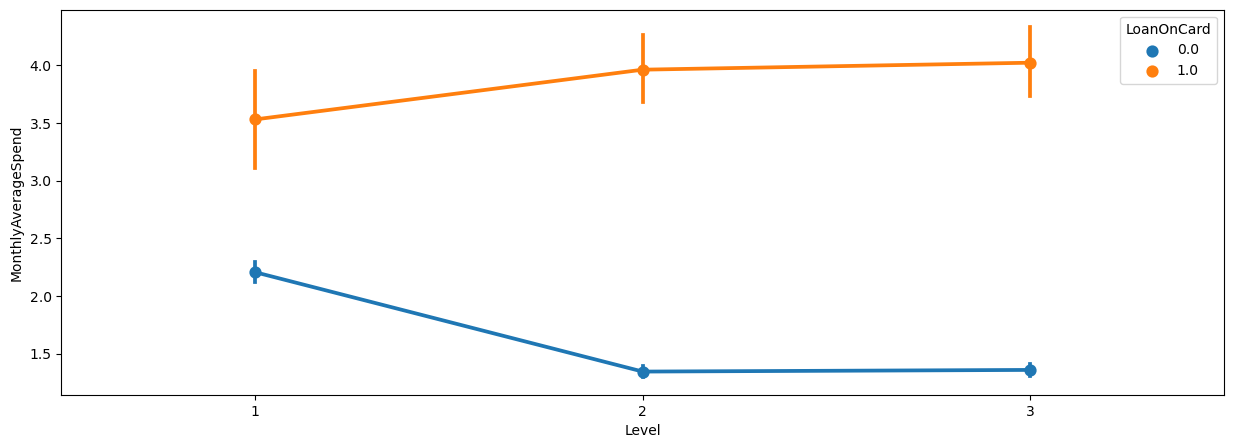

In [47]:
#1.Monthly average spend vs loan vs level
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)
plt.show()

>**Loan holders have a higher spending rate than non-loan holders.**

>**Specifically, the spending is significantly higher among level 2 and 3 customers who have loans.**

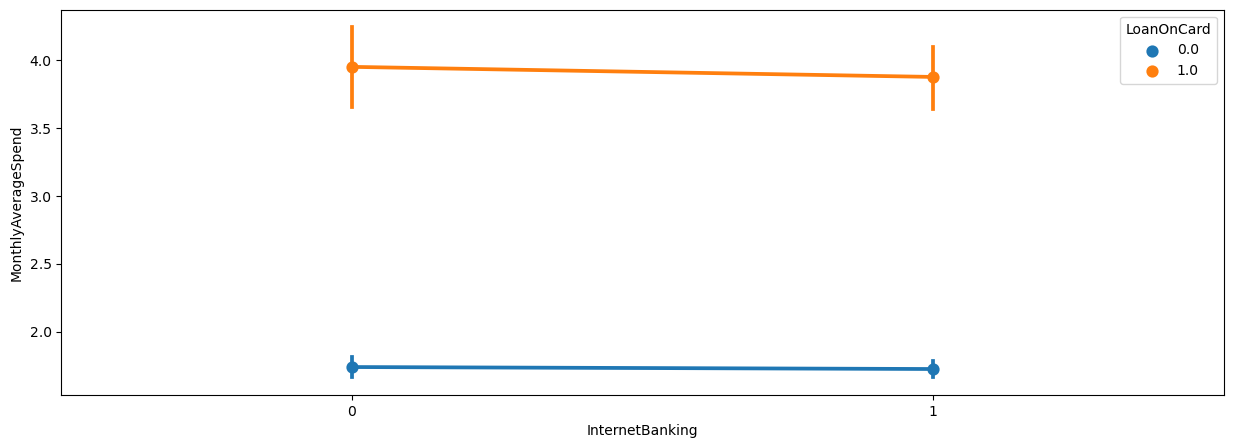

In [48]:
#2.MonthlyAverageSpend v sLoan vs InternetBanking
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetBanking", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)
plt.show()

>**There doesn't seem to be any significant impact of internet banking on the data.**

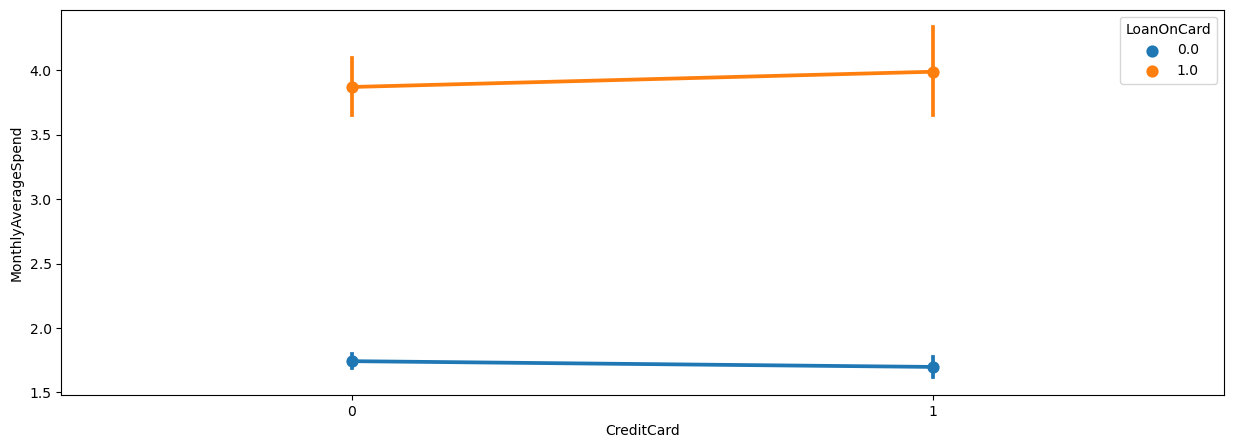

In [49]:
#3.MonthlyAverageSpend vs Loan vs CreditCard
plt.figure(figsize=(15,5))
sns.pointplot(x="CreditCard", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)
plt.show()

>**Customers with credit card tend to have slightly higher spending.**

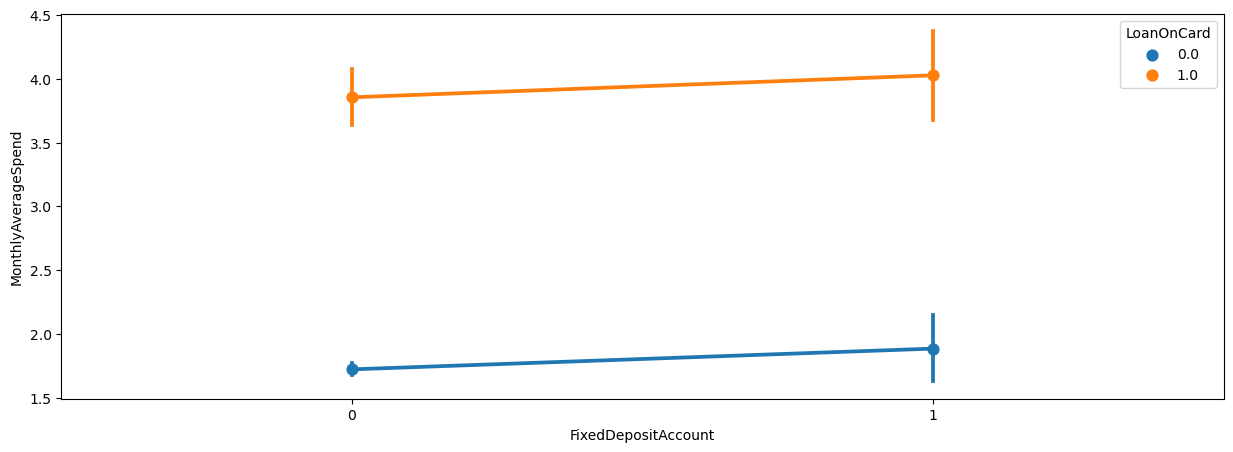

In [50]:
# 4.MonthlyAverageSpend vs Loan vs FixedDepositAccount
plt.figure(figsize=(15,5))
sns.pointplot(x="FixedDepositAccount", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=data)
plt.show()

>**On average, customers with FD Accounts tend to spend slightly more than those without.**

#### Hypothesis Testing


In [51]:
#Getting mean values of each class for all independent variables
class_summary=data.groupby('LoanOnCard')
class_summary.mean().reset_index()

,LoanOnCard,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
0,0.0,2523.112889,45.383111,20.146889,66.290444,93152.337111,1.729849,51.869111
1,1.0,2390.650000,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


>**The mean value of the "highest spend" variable is significantly higher for loan customers compared to non-loan customers.**

>**There is no significant difference in the mean age value between loan and non-loan customers.**

**Statistical Testing of continuous feature with target variable**

In [52]:
data.drop('ID',axis=1,inplace=True)
col=list(data.select_dtypes(include=['int64','float64']).columns)
col

['Age',
 'CustomerSince',
 'HighestSpend',
 'ZipCode',
 'MonthlyAverageSpend',
 'Mortgage']

**Using 2 sample t test**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [53]:
from scipy import stats
for i in col:
    x = data.loc[data['LoanOnCard'] == 0, i].values
    y = data.loc[data['LoanOnCard'] == 1, i].values
    t, p_value = stats.ttest_ind(x, y, axis=0, equal_var=False)
    print(f'{i} P_Value: {p_value:.4f}')
    if p_value < 0.05:  
        print(f'Rejecting Null Hypothesis. {i} of Loan holders and non-Loan holders are not same')
    else:
        print(f'Fail to Reject Null Hypothesis. {i} of Loan holders and non-Loan holders are same')
    print('\n')


Age P_Value: 0.5694
Fail to Reject Null Hypothesis. Age of Loan holders and non-Loan holders are same


CustomerSince P_Value: 0.5855
Fail to Reject Null Hypothesis. CustomerSince of Loan holders and non-Loan holders are same


HighestSpend P_Value: 0.0000
Rejecting Null Hypothesis. HighestSpend of Loan holders and non-Loan holders are not same


ZipCode P_Value: 0.9920
Fail to Reject Null Hypothesis. ZipCode of Loan holders and non-Loan holders are same


MonthlyAverageSpend P_Value: 0.0000
Rejecting Null Hypothesis. MonthlyAverageSpend of Loan holders and non-Loan holders are not same


Mortgage P_Value: 0.0000
Rejecting Null Hypothesis. Mortgage of Loan holders and non-Loan holders are not same




>**We can conclude that age, customer since, and zip code do not have a significant effect on the target variable.**

>**Therefore,dropping these columns before building a model.**

In [54]:
data.drop(['Age','CustomerSince','ZipCode'],axis=1,inplace=True)

**Statistical Testing of categorical features with target variable**

**Ho: There is no significant difference in hidden score for different category of target variable(Loan on card)**

**H1: There is significant difference in hidden score for different category of target variable(Loan on card)**    

In [55]:
tab=pd.crosstab(data['LoanOnCard'],data['HiddenScore'])
print(tab)
print("-----------------------------------------------")
chi,p_value,dof,expected=stats.chi2_contingency(tab)
print('P_Value:', p_value)

HiddenScore     1     2    3     4
LoanOnCard                        
0.0          1359  1187  873  1081
1.0           107   106  133   134
-----------------------------------------------
P_Value: 1.5107064617649127e-06


In [56]:
if p_value < 0.05:
    print('Rejecting Null Hypothesis.\nThere is significant difference in hidden score for different categories of Loan on Card')
else:
    print('Fail to Reject Null Hypothesis.\nThere is no significant difference in hidden score for different categories of Loan on Card')

Rejecting Null Hypothesis.
There is significant difference in hidden score for different categories of Loan on Card


In [57]:
#Checking for rest of the catgorical variables
cat_col=list(data.select_dtypes(include=['category']).columns)
cat_col.remove('HiddenScore')
cat_col.remove('LoanOnCard')

In [58]:
for i in cat_col:
    crosstab=pd.crosstab(data['LoanOnCard'],data[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis. \n There is significant difference in Feature for different category of target variable(Loan on card)')
    else:
        print('Fail to Reject Null Hypothesis.\n There is no significant difference in Feature for different category of target variable(Loan on card)')
    print('\n')

Rejecting Null Hypothesis. 
 There is significant difference in Feature for different category of target variable(Loan on card)


Fail to Reject Null Hypothesis.
 There is no significant difference in Feature for different category of target variable(Loan on card)


Rejecting Null Hypothesis. 
 There is significant difference in Feature for different category of target variable(Loan on card)


Fail to Reject Null Hypothesis.
 There is no significant difference in Feature for different category of target variable(Loan on card)


Fail to Reject Null Hypothesis.
 There is no significant difference in Feature for different category of target variable(Loan on card)




**We can see credit card,internet banking and security does not have significant difference in target variable.So dropping this column before building model**

In [59]:
data.drop(['CreditCard','InternetBanking','Security'],axis=1,inplace=True)

### 4. Data Pre-processing


**Outlier analysis**

In [60]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [61]:
data.dtypes

HighestSpend              int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
FixedDepositAccount    category
LoanOnCard             category
dtype: object

In [62]:
for c in col:
    #getting upper lower quartile values
    q25, q75 = np.percentile(data[c], 25), np.percentile(data[c], 75)
    IQR = q75 - q25
    Threshold = IQR * 1.5
    lower, upper = q25 - Threshold, q75 + Threshold
    outliers = [i for i in data[c] if i < lower or i > upper]
    print('Total Number of outliers in {} Before Imputing : {}'.format(c, len(outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    data_include = data.loc[(data[c] >= lower) & (data[c] <= upper)]
    mean = int(data_include[c].mean())
    print('Mean of {} is {}'.format(c, mean))
    print('\n')
    #imputing outliers with mean
    data[c] = np.where(data[c] > upper, mean, data[c])
    data[c] = np.where(data[c] < lower, mean, data[c])
    outliers = [i for i in data[c] if i < lower or i > upper]
    print('Total Number of outliers in {} After Imputing : {}'.format(c, len(outliers)))  
    print('\n')


Total Number of outliers in HighestSpend Before Imputing : 96


Mean of HighestSpend is 71


Total Number of outliers in HighestSpend After Imputing : 0


Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


Mean of MonthlyAverageSpend is 1


Total Number of outliers in MonthlyAverageSpend After Imputing : 0


Total Number of outliers in Mortgage Before Imputing : 291


Mean of Mortgage is 38


Total Number of outliers in Mortgage After Imputing : 0




>**Done imputing all the outliers with the mean**


### Checking on Target Imbalance

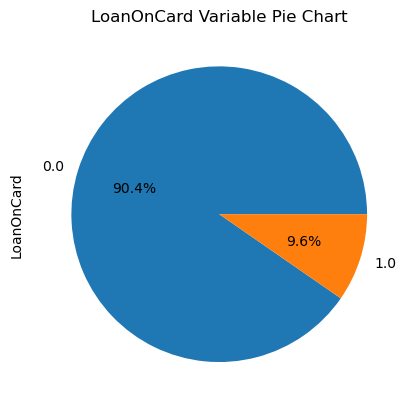

In [63]:
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('LoanOnCard Variable Pie Chart')
plt.show()

>**There is a huge imbalance in the target variable, which can lead to poor performance of the classifier model.**

>**Neglecting to treat the imbalanced data can cause the majority class to dominate predictions and the minority class features to be ignored as noise, resulting in a high bias in the model.**

>**To address this issue, a commonly used technique is resampling.**

**Using Oversampling here as undersampling may remove important information for the data.**

**SMOTE for target imbalance**

### Segregating variables as Target and Predictors

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [65]:
X=data.drop(columns='LoanOnCard')
y=data['LoanOnCard']#target variable

In [66]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

### 5. Model training

**LOGISTIC REGRESSION MODEL**

In [67]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9506597819850832
Accuracy on Test data: 0.9424364123159303


>**95% accuracy on training set and 94% accuracy on test set.**

>**Here training accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good**

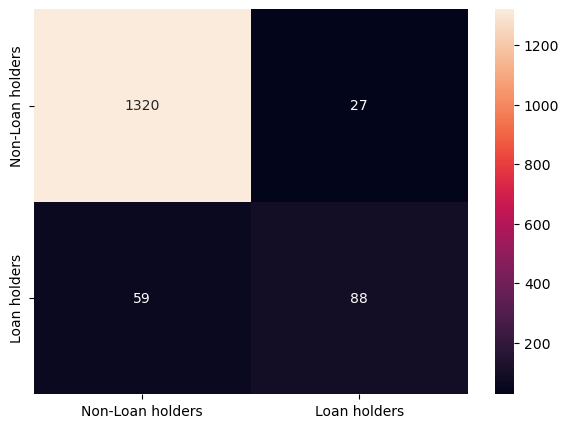

In [68]:
c_matrix= confusion_matrix(y_test, logit_pred, labels=[0, 1])

data_c_matrix= pd.DataFrame(c_matrix, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_c_matrix, annot=True ,fmt='g')
plt.show()

>**The figure above shows that the model has high level of accuracy and a low error rate.**

In [69]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1347
         1.0       0.77      0.60      0.67       147

    accuracy                           0.94      1494
   macro avg       0.86      0.79      0.82      1494
weighted avg       0.94      0.94      0.94      1494



>**The model is having difficulty in accurately predicting class 1 compared to class 0.**

>**While the overall accuracy of the model may be good, it is important to consider the recall value for class 1 in this case.
The recall value indicates that only 48% of class 1 instances were correctly predicted by the model compared to the actual values.**

>**This suggests that there may not have been enough samples of class 1 in the training data for the model to properly learn and predict this class.**

>**To address this issue, we can try sampling techniques to increase the number of class 1 instances in the training data and evaluate if this improves the recall value for this class.**

### SMOTE

In [70]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [71]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [72]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


**Now the target is balanced after sampling**

In [73]:
#Splitting the data again after sampling
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.30, random_state=10)

In [74]:
#Logistic Regression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8749206349206349
Accuracy on Test data: 0.8822222222222222


**We can see that the accuracy has decreased for both train and test**

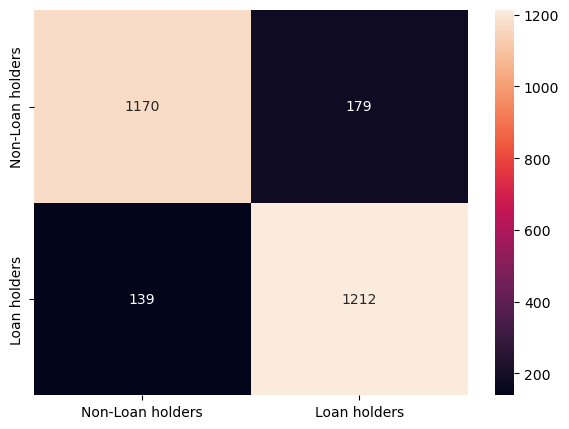

In [75]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

data_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot=True ,fmt='g')
plt.show()

In [76]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1349
         1.0       0.87      0.90      0.88      1351

    accuracy                           0.88      2700
   macro avg       0.88      0.88      0.88      2700
weighted avg       0.88      0.88      0.88      2700



>**After applying sampling techniques to balance the data, we can observe an improvement in the recall value.
This suggests that the previous poor performance of the model in predicting class 1 was due to the imbalance in the training data.**

>**When dealing with imbalanced target variables, using sampling methods to balance the data can be an effective way to improve the performance of the model on the minority class.**

**SMOTE only on training data**


In [77]:
# Split data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [78]:
smote_nc=SMOTENC(categorical_features=[1,3,5],random_state=42)
x_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [79]:
logit = LogisticRegression()
logit.fit(x_train_res, y_train_res)
logit_pred = logit.predict(X_test)
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8757888697647733
Accuracy on Test data: 0.8661311914323963


**There is decrease in test accuracy.**

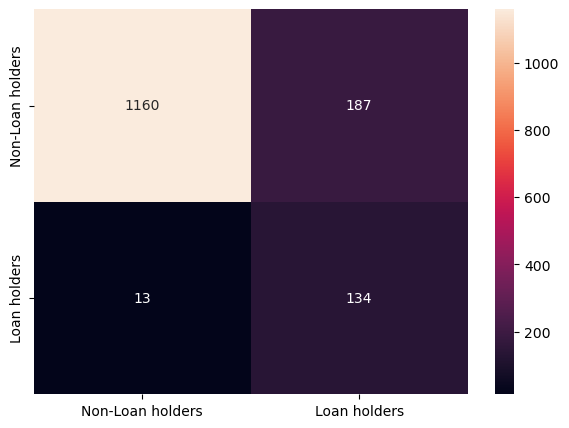

In [80]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

data_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm, annot=True ,fmt='g')
plt.show()

In [81]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1347
         1.0       0.42      0.91      0.57       147

    accuracy                           0.87      1494
   macro avg       0.70      0.89      0.75      1494
weighted avg       0.93      0.87      0.89      1494



>**By applying sampling techniques to the training data, we can observe a difference in the performance of the model.**

>**The recall value improves, indicating better prediction of the minority class.**

>**However, the precision value may decrease, suggesting that the model may predict more false positives.**

>**To evaluate the real performance of the model, we should use sampling only on the training data and not on the test data.**

**NAIVE BAYES MODEL**


In [82]:
g_model = GaussianNB()
g_model.fit(x_train_res, y_train_res.ravel())
g_pred = g_model.predict(X_test)

print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )

Accuracy on Training data: 0.8803786574870912
Accuracy on Test data: 0.8621151271753681


>**Accuracy in test data is slightly less compared to training data.**

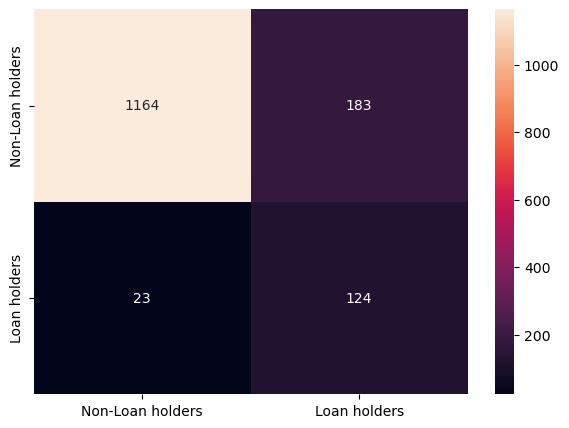

In [83]:
cm = confusion_matrix(y_test, g_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [84]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1347
         1.0       0.40      0.84      0.55       147

    accuracy                           0.86      1494
   macro avg       0.69      0.85      0.73      1494
weighted avg       0.92      0.86      0.88      1494



>**Recall value is good for both the classes**

>**Recall value for class 1 is less in naive bayes model compared to logistic regression.**

**RANDOM FOREST**

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
RF_model = RandomForestClassifier(n_estimators=100, random_state=21)
#Fitting the model
RF_model.fit(X_train, y_train)
train_acc = accuracy_score(y_train, RF_model.predict(X_train))
print("Train accuracy:", train_acc)
test_acc = accuracy_score(y_test, RF_model.predict(X_test))
print("Test accuracy:", test_acc)

Train accuracy: 1.0
Test accuracy: 0.9825970548862115


### 6. Model Selection

In [86]:
#Accuracies for each model
print("Logistic Regression")
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )
print("\nNaive Bayes")
print('Accuracy on Training data:',g_model.score(X_train, y_train) )
print('Accuracy on Test data:',g_model.score(X_test, y_test) )
print("\nRandom forest")
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

Logistic Regression
Accuracy on Training data: 0.8757888697647733
Accuracy on Test data: 0.8661311914323963

Naive Bayes
Accuracy on Training data: 0.8803786574870912
Accuracy on Test data: 0.8621151271753681

Random forest
Train accuracy: 1.0
Test accuracy: 0.9825970548862115


>**Logistic Regression and Naive Bayes models have lower accuracies than Random Forest on both training and test data.**

>**Random Forest has the highest accuracy on both training (1.0) and test (0.98) data.**

**Applying tuning parameters**

In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
#Defining hyper-parameters
logit_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
g_param_grid = {}
RF_param_dist = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30, None]}
#Hyperparameter tuning with cross-validation
logit_cv = GridSearchCV(logit, logit_param_grid, cv=5)
logit_cv.fit(X_train, y_train)
print("Logistic Regression: Best parameters:", logit_cv.best_params_)
print("Logistic Regression: Best score:", logit_cv.best_score_)

g_cv = GridSearchCV(g_model, g_param_grid, cv=5)
g_cv.fit(X_train, y_train)
print("Naive Bayes: Best parameters:", g_cv.best_params_)
print("Naive Bayes: Best score:", g_cv.best_score_)

RF_cv = RandomizedSearchCV(RF_model, RF_param_dist, n_iter=20, cv=5, random_state=42)
RF_cv.fit(X_train, y_train)
print("Random Forest: Best parameters:", RF_cv.best_params_)
print("Random Forest: Best score:", RF_cv.best_score_)

#Selecting best model based on cross-validation score
best_model = None
best_score = -1

if logit_cv.best_score_ > best_score:
    best_score = logit_cv.best_score_
    best_model = logit_cv.best_estimator_
if g_cv.best_score_ > best_score:
    best_score = g_cv.best_score_
    best_model = g_cv.best_estimator_
if RF_cv.best_score_ > best_score:
    best_score = RF_cv.best_score_
    best_model = RF_cv.best_estimator_
#Evaluating best model using cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Best model: Cross-validation score:", np.mean(scores))
#Evaluating best model on the test set
best_model.fit(X_train, y_train)
print("Best model: Test accuracy without feature selection:", accuracy_score(y_test, best_model.predict(X_test)))
print("Best model: Confusion matrix:")
print(confusion_matrix(y_test, best_model.predict(X_test)))
print("Best model: Classification report:")
print(classification_report(y_test, best_model.predict(X_test)))

Logistic Regression: Best parameters: {'C': 10, 'penalty': 'l2'}
Logistic Regression: Best score: 0.9492252921855023
Naive Bayes: Best parameters: {}
Naive Bayes: Best score: 0.9102107682125196
Random Forest: Best parameters: {'n_estimators': 200, 'max_depth': 20}
Random Forest: Best score: 0.9810674482945739
Best model: Cross-validation score: 0.9810674482945739
Best model: Test accuracy without feature selection: 0.9819277108433735
Best model: Confusion matrix:
[[1345    2]
 [  25  122]]
Best model: Classification report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1347
         1.0       0.98      0.83      0.90       147

    accuracy                           0.98      1494
   macro avg       0.98      0.91      0.95      1494
weighted avg       0.98      0.98      0.98      1494



**Random Forest outperformed Logistic Regression and Naive Bayes in terms of cross-validation score and test accuracy.**

**Random Forest's best parameters were {'n_estimators': 200, 'max_depth': 20}.**

**Logistic Regression's best parameters were {'C': 10, 'penalty': 'l2'}.**

**Random Forest has the highest test accuracy of 0.981, followed by Logistic Regression with 0.94 and Naive Bayes with 0.91.**

**Random Forest's confusion matrix and classification report shows that it has very good precision, recall, and f1-score for both classes.**

**Logistic Regression also performed well in terms of precision, recall, and f1-score, although not as good as Random Forest.**

**Naive Bayes has a slightly lower precision and recall than Random Forest and Logistic Regression.**

**The overall accuracy of all three models is very high, indicating that they are good at predicting the target variable.**

**Based on the performance of all three models, Random Forest is the best model for this dataset.**

### 7. Conclusion and Improvisation

>**To improve the quality of data analysis in future, it is recommended to ensure that the data is collected in an unbiased and representative manner. This can be achieved by collecting data equally for both classes, i.e., customers who have taken loans and those who have not.**

>**It is also important to ensure the accuracy of the data collected. For instance, there are some customers who do not have a credit card, but have a loan on the card. This could be a data error, and steps should be taken to avoid such errors in the future.**